<a href="https://colab.research.google.com/github/FaithWambugu/FaithWambugu/blob/main/FAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import relevant libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta


In [ ]:
#read production data
fprod = pd.read_csv('Africa Food Production (2004 - 2013).csv')

In [ ]:
#view first few rows
fprod.head(3)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688


In [ ]:
fprod.shape

(23110, 4)

In [ ]:
fprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [ ]:
fprod.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [ ]:
 #fprod.astype({'Year':'datetime64[ns]'})

In [ ]:
#convert dates to DateObject
fprod['Year'] = pd.to_datetime(fprod['Year'], format='%Y')
fprod['Year'] = fprod['Year'].dt.year

In [ ]:
fprod['Year']

0        2004
1        2005
2        2006
3        2007
4        2008
         ... 
23105    2009
23106    2010
23107    2011
23108    2012
23109    2013
Name: Year, Length: 23110, dtype: int64

In [ ]:
#add units (1000 tons [metric kilotons]) to values, to make them Quantities. 

# Create a unit registry and define the unit for the values column
#ureg = UnitRegistry()
#unit = ureg.parse_expression('1000 * tons')

# Convert the values column to quantities
#fprod['Value'] = fprod['Value'].apply(lambda x: x * unit)


In [ ]:
fprod['Value']

0        2731
1        2415
2        2688
3        2319
4        1111
         ... 
23105       0
23106       0
23107       0
23108       0
23109       0
Name: Value, Length: 23110, dtype: int64

In [ ]:
fprod.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [ ]:
fprod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [ ]:
#unique
fprod['Country'].nunique()

45

In [ ]:
fprod['Item'].nunique()

94

In [ ]:
fprod['Year'].nunique()

10

In [ ]:
#Group all entries by country then year then item
fprodgrouped = fprod.groupby(['Country','Year', 'Item'])
 

In [ ]:
fprodgrouped.head(10)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [ ]:
#for each country, each year, sum up all items
#grouped = fprod.groupby(['Country', 'Year'], as_index=False)['Value'].sum()
grouped = fprod.groupby(['Country', 'Year']).sum().reset_index()#agg({'Value':'sum'}).reset_index()


In [ ]:
# values of all items are totalled, for each year.
grouped.head(15)

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
5,Algeria,2009,19820
6,Algeria,2010,20263
7,Algeria,2011,21778
8,Algeria,2012,24206
9,Algeria,2013,26359


In [ ]:
#Method 2
#grouped = fprod.groupby(['Country', 'Year']).aggregate({'Value': 'sum'})
#print(grouped.head())

In [ ]:
#grouped['Value'] = grouped['Value'].astype(str)

In [ ]:
f = fprod.groupby(['Country']).sum().reset_index()
f.drop(['Year'],axis =1)
f.head()

,Country,Year,Value
0,Algeria,1164930,188650
1,Angola,1084590,195499
2,Benin,1185015,88072
3,Botswana,682890,4808
4,Burkina Faso,863655,100129


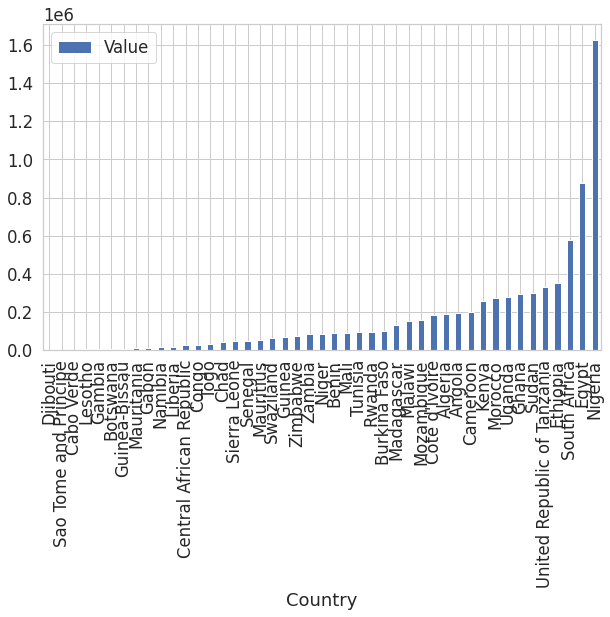

In [ ]:
#total production for each country across all years
f.sort_values('Value', ascending=True).plot.bar(x ='Country', y ='Value',figsize=(10,6))

Nigeria, Egypt and South Africa were the top food producing countries between 2004 and 2013.

In [ ]:
p = fprod.groupby(['Year']).sum().reset_index()
p.head()

,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804


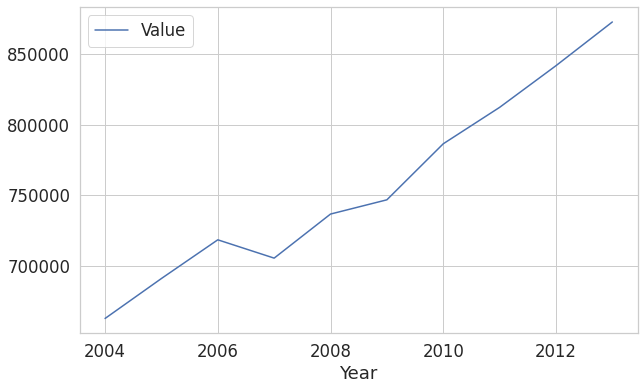

In [ ]:
#total production for each year across all countries
p.plot.line(x ='Year', y ='Value',figsize=(10,6))

Food production increased rather smoothly over the years,however,between 2006 and 2007 it decreased significantly.

#Supply data


In [ ]:
#Import and read the supply data
supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

In [ ]:
supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [ ]:
#convert the years to date objects
# Convert the year column to datetime and keep only the year
supply['Year'] = pd.to_datetime(supply['Year'], format='%Y')
supply['Year'] = supply['Year'].dt.year

# Check the new dataframe
print(supply.head())

   Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048


In [ ]:
supply["Value"]=supply["Value"].astype(float)

In [ ]:
supply.dtypes

Country     object
Year         int64
Value      float64
dtype: object

In [ ]:
grp = supply.groupby(['Country','Year'])['Value'].sum().reset_index()
grp.head()


,Country,Year,Value
0,Algeria,2004,2987.0
1,Algeria,2005,2958.0
2,Algeria,2006,3047.0
3,Algeria,2007,3041.0
4,Algeria,2008,3048.0


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

<function matplotlib.pyplot.show(*args, **kw)>

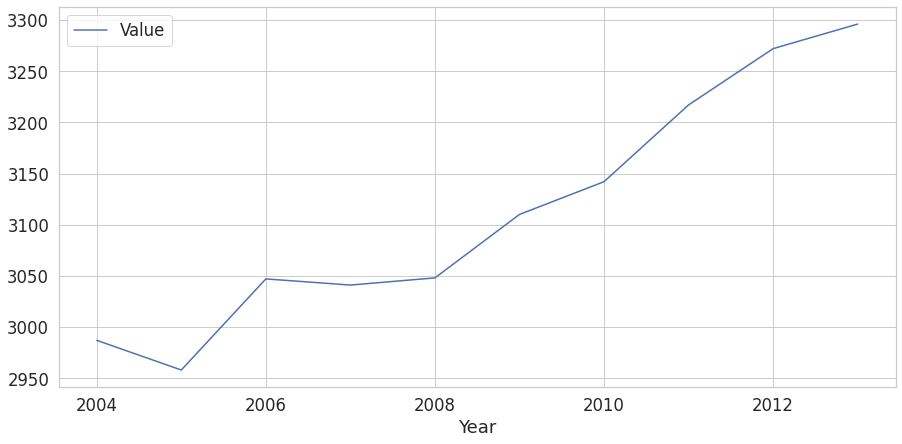

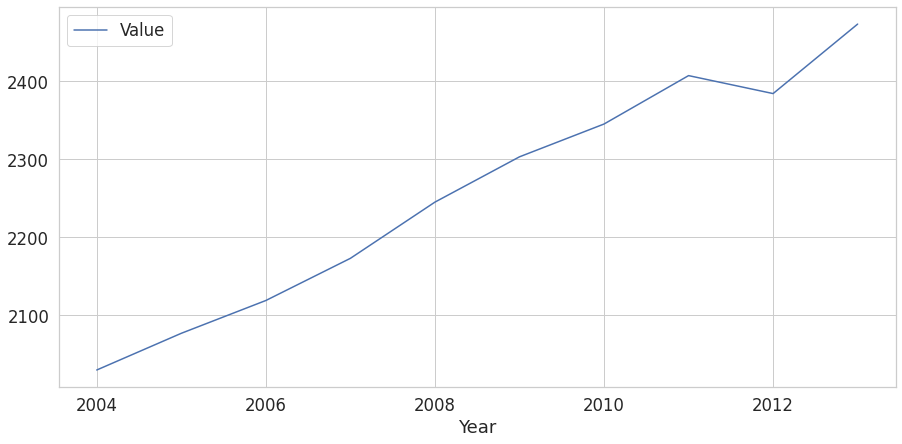

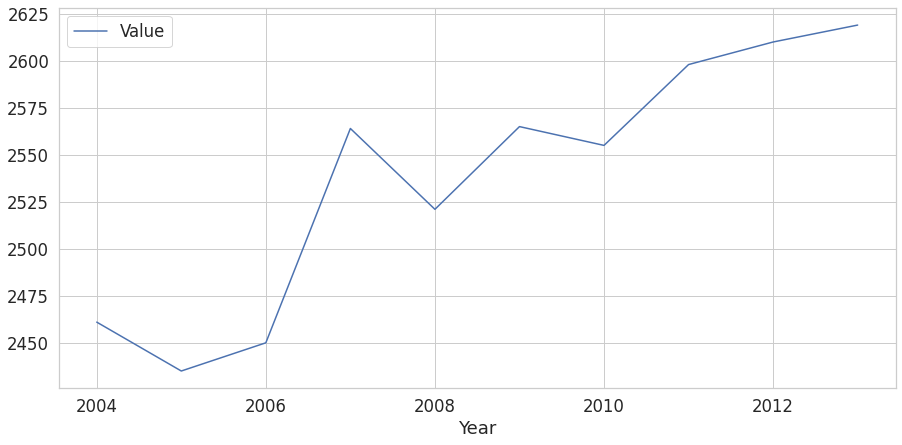

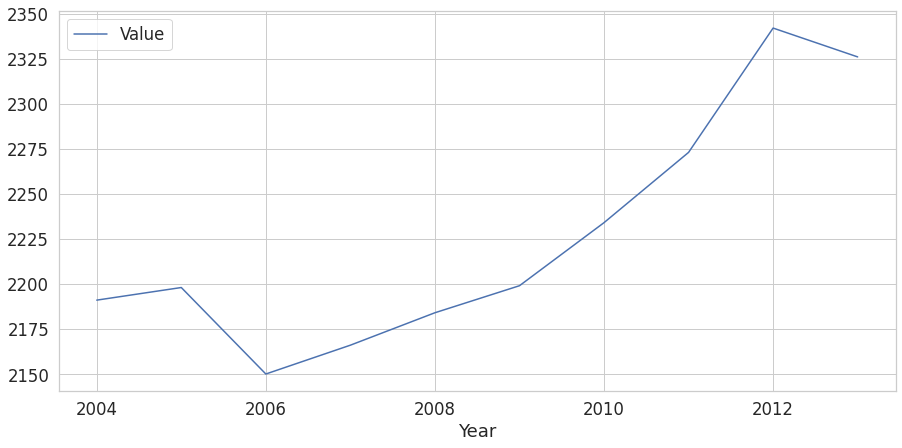

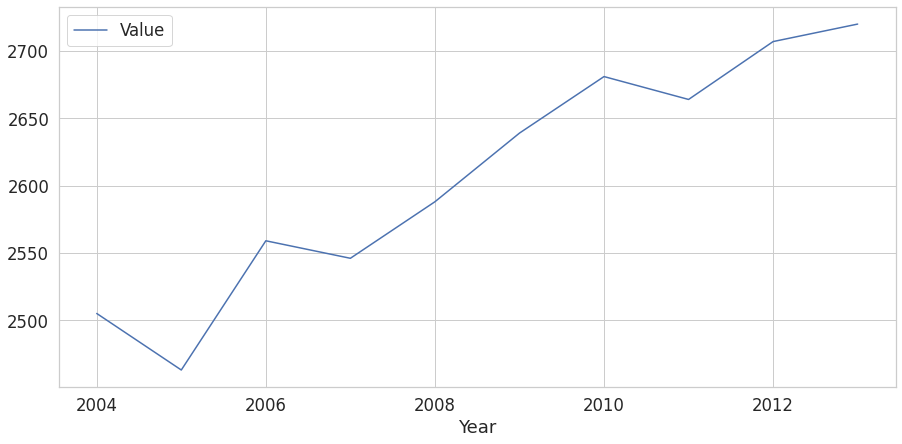

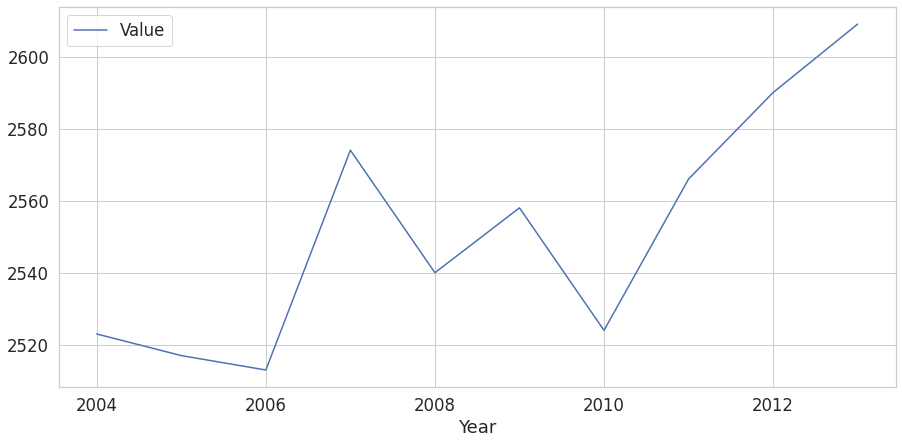

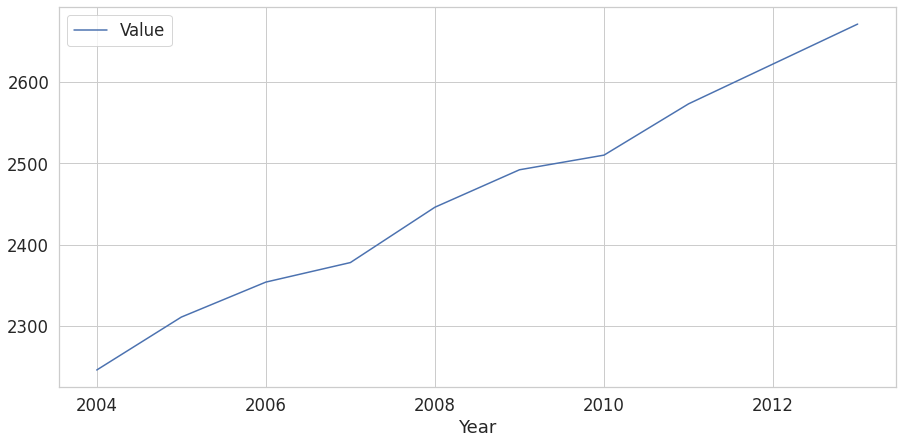

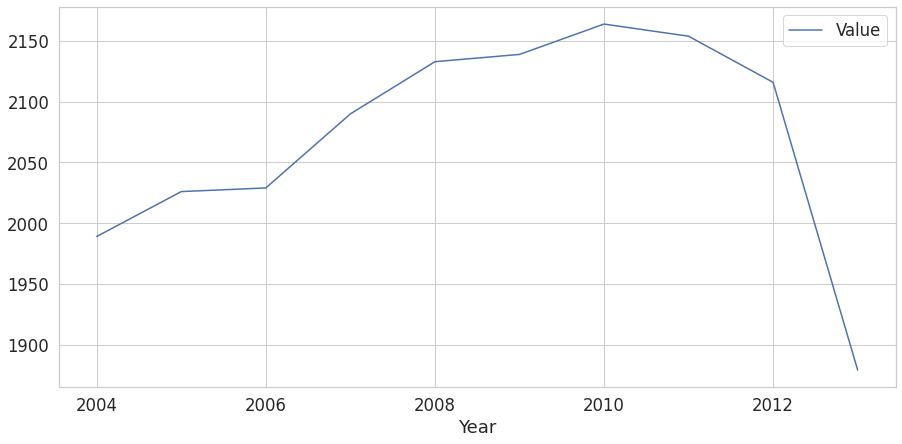

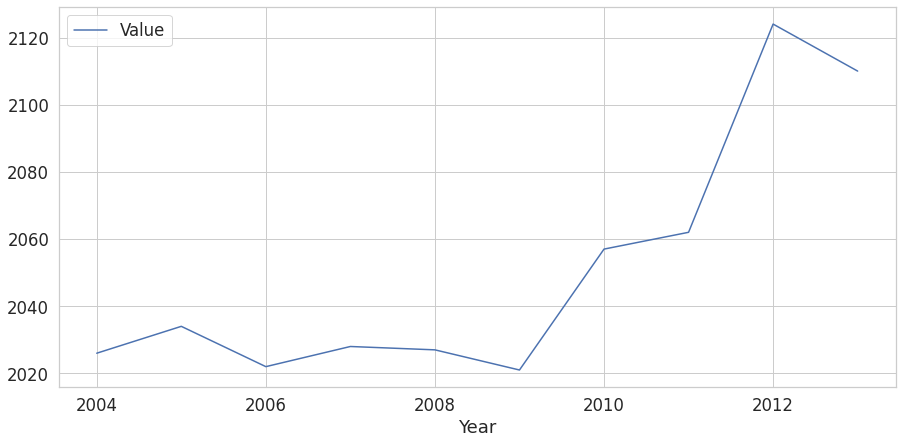

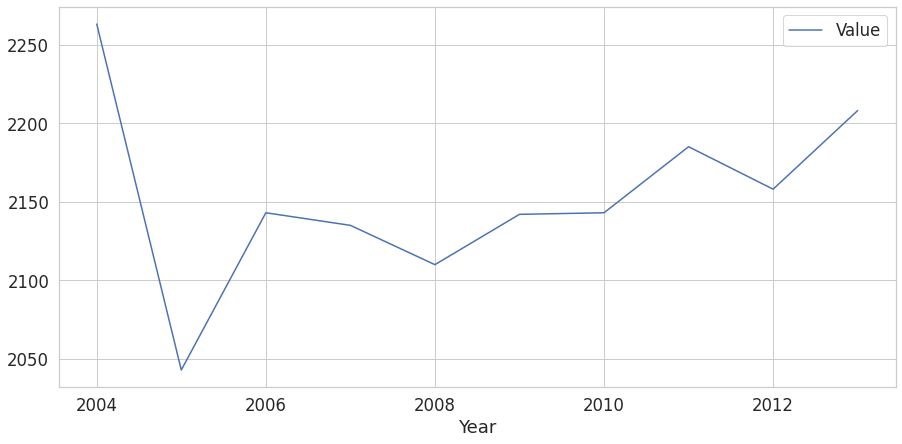

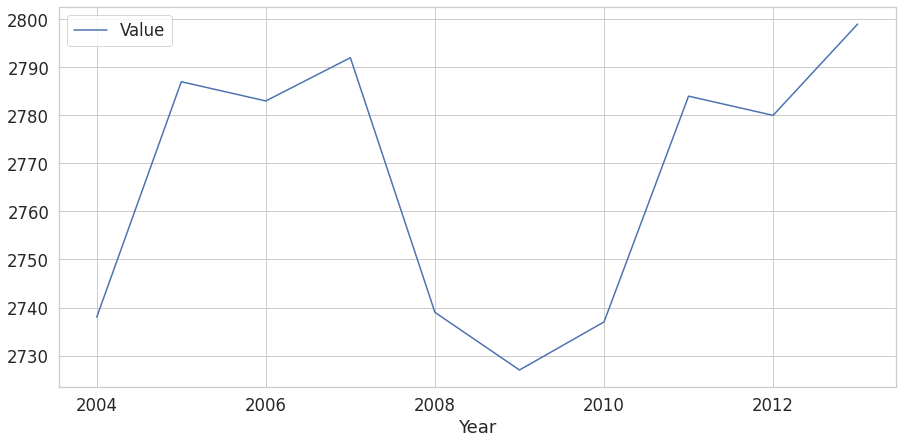

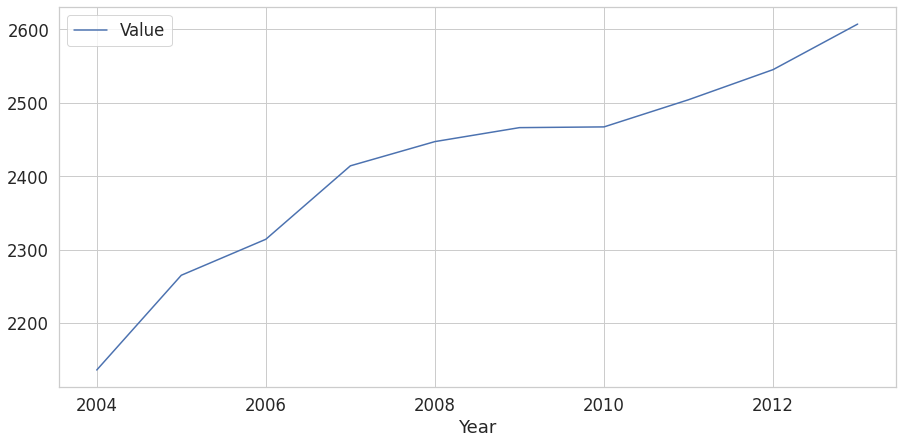

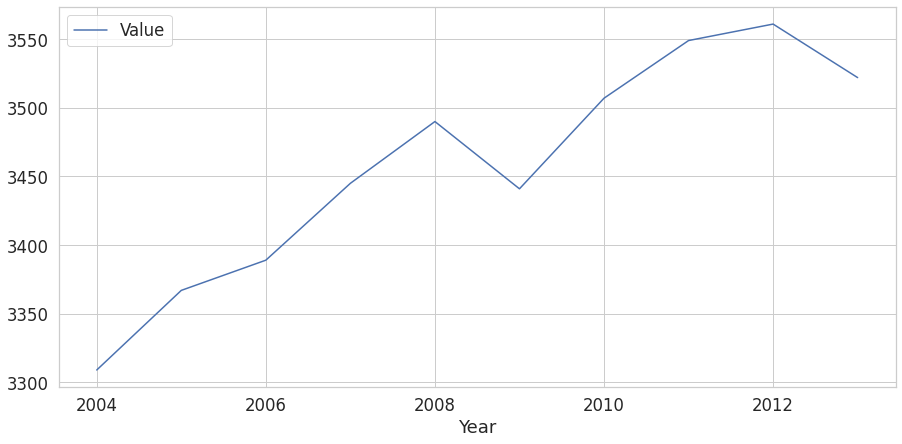

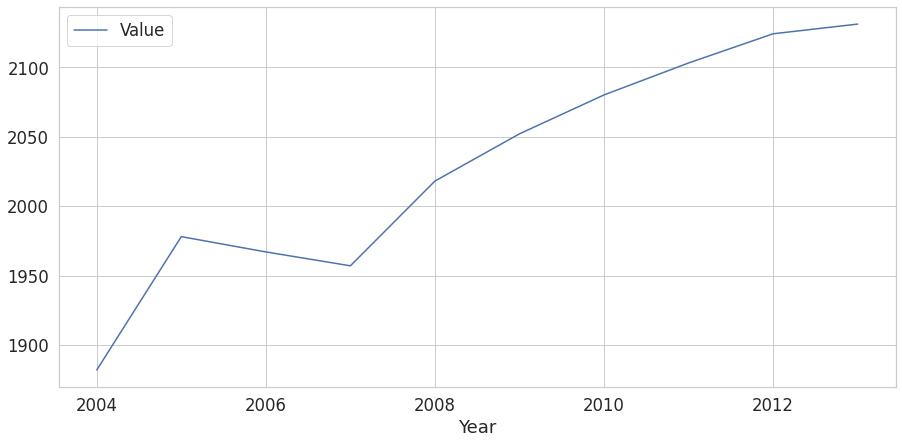

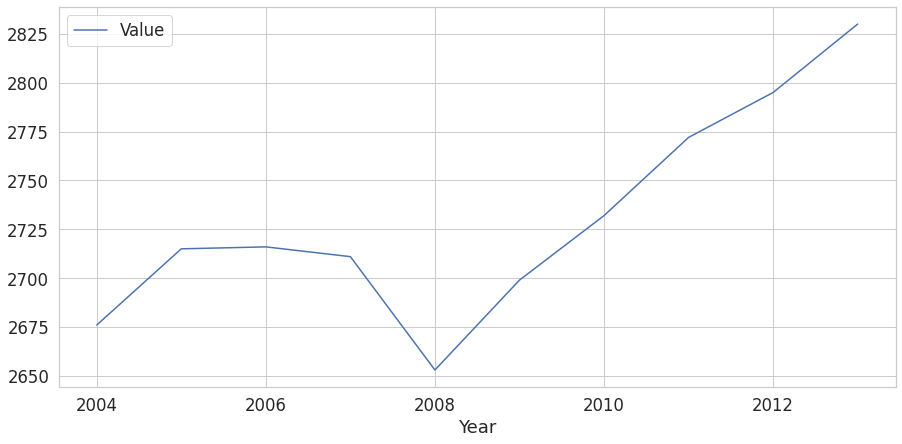

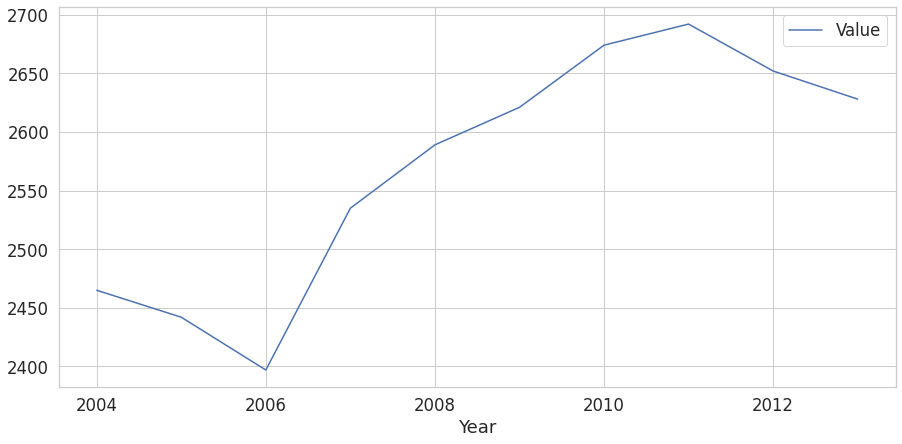

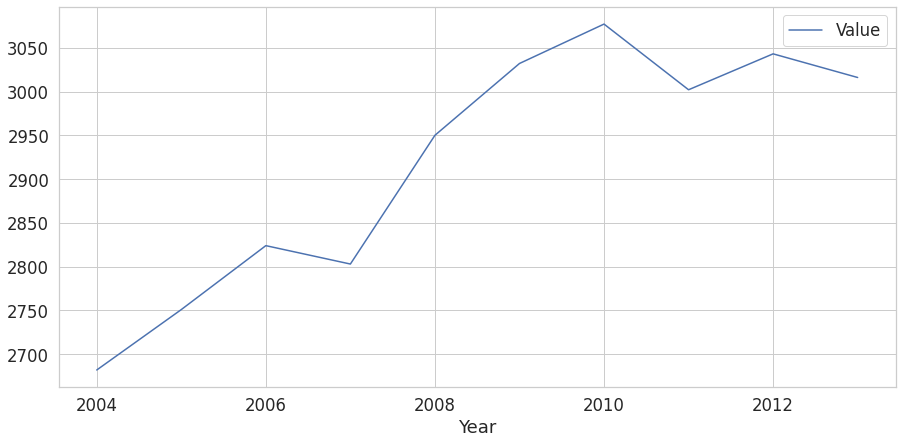

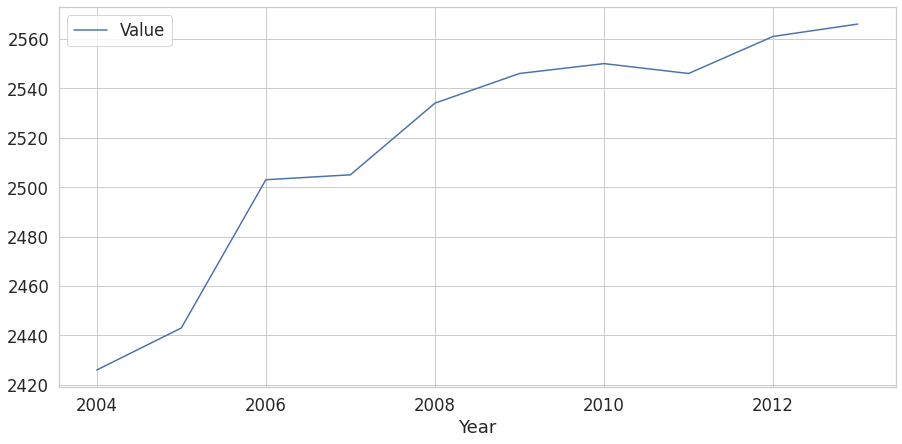

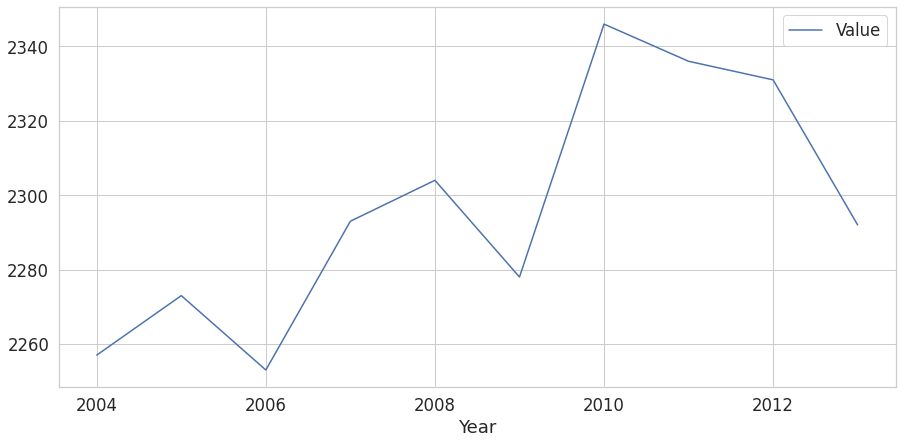

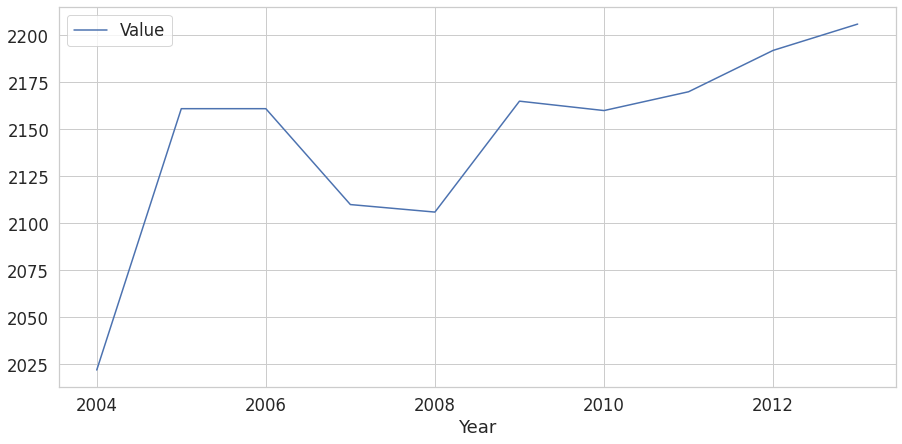

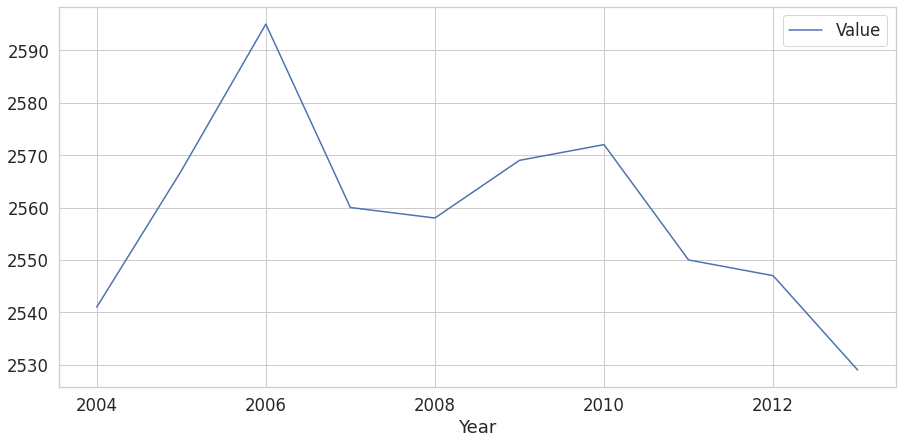

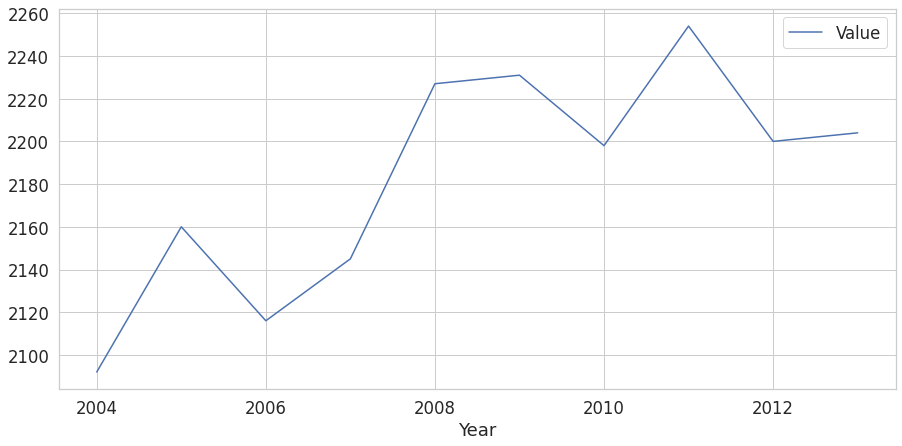

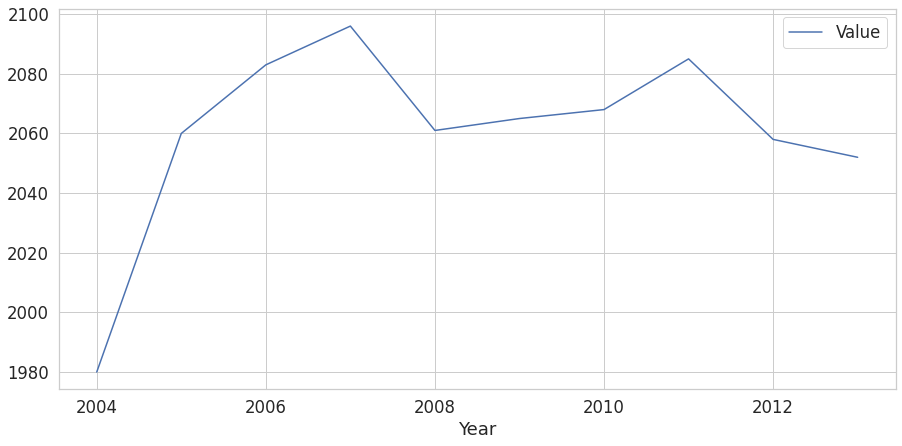

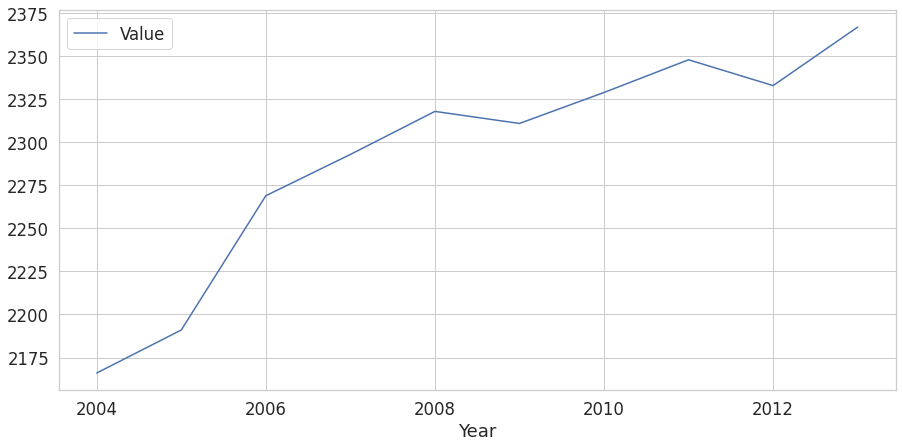

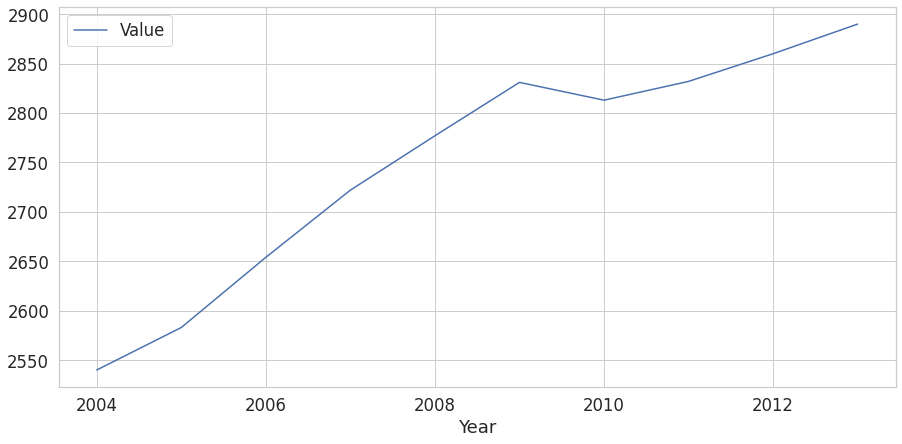

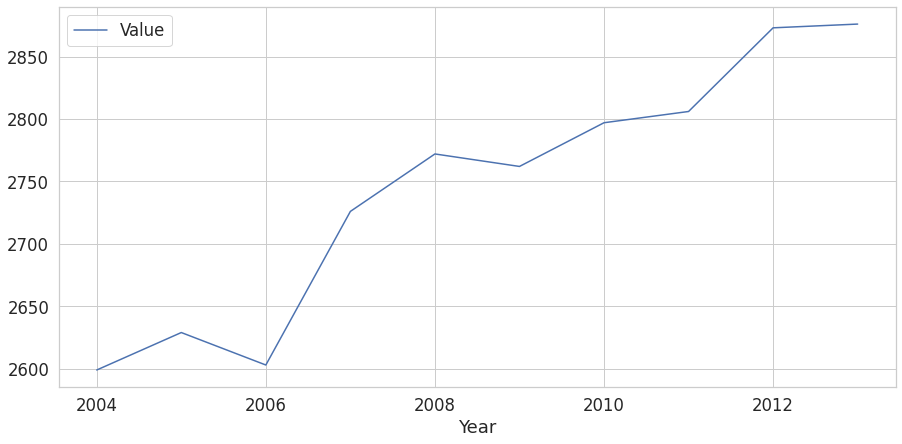

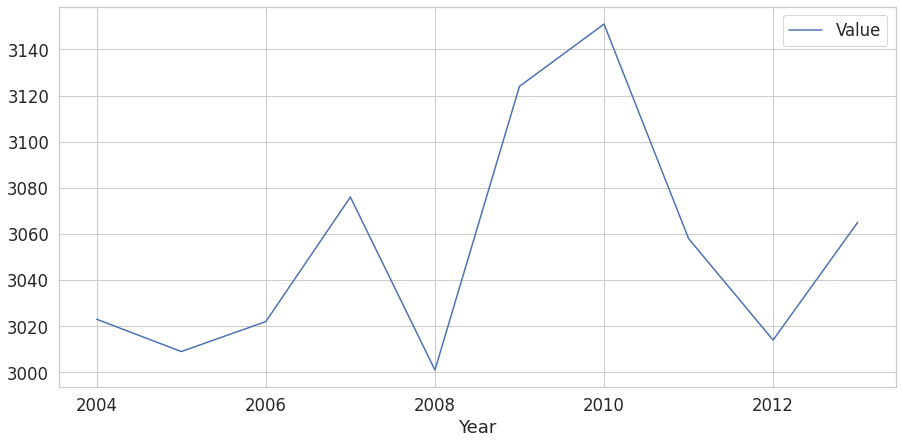

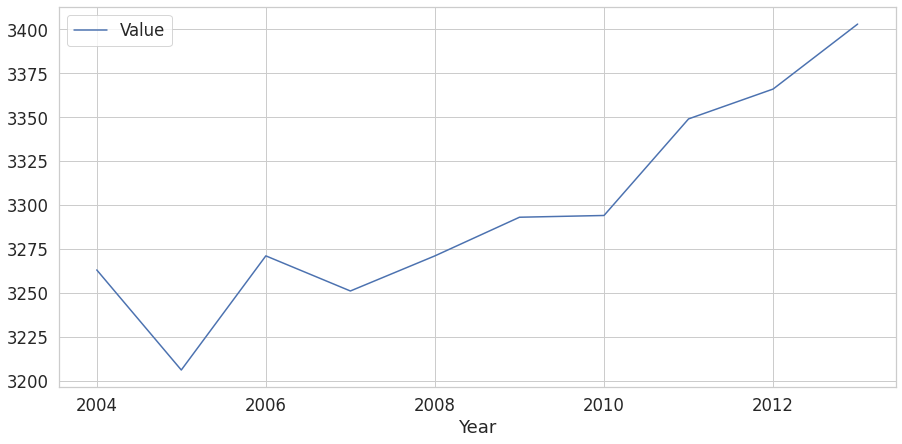

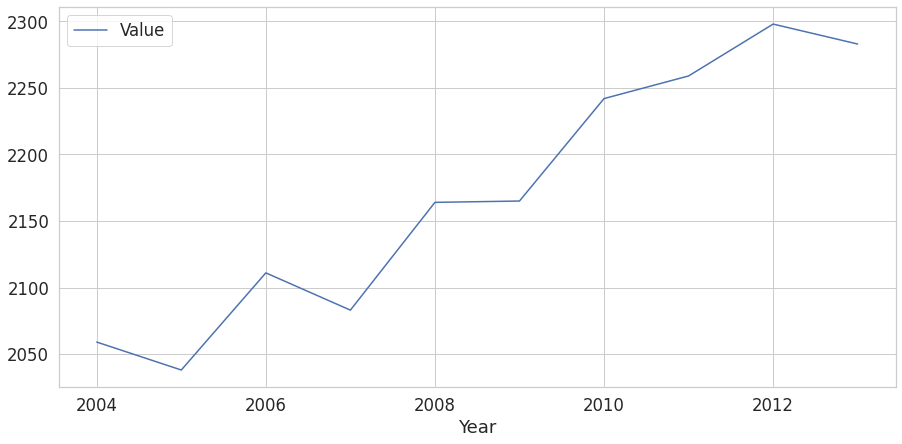

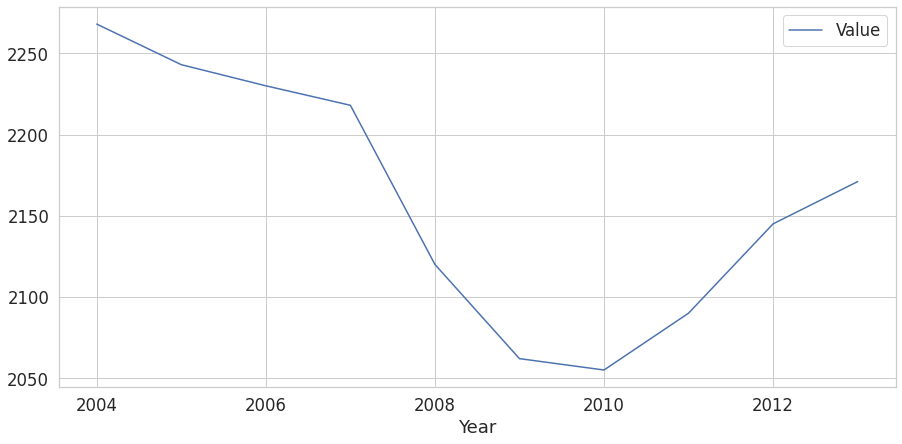

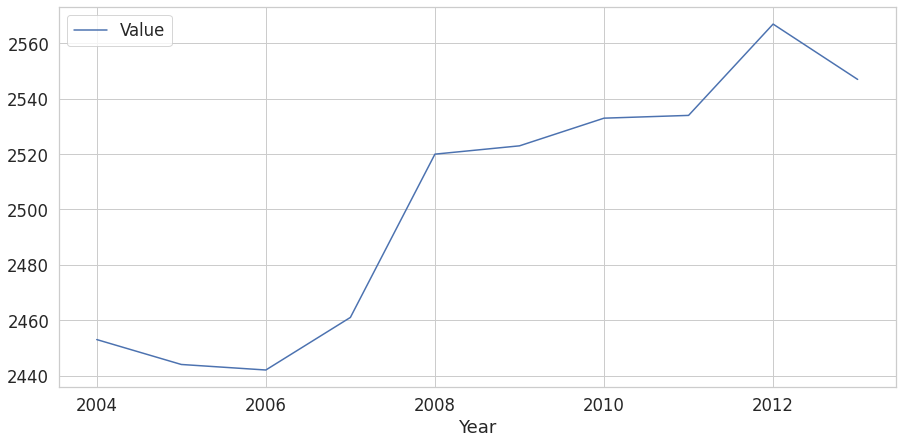

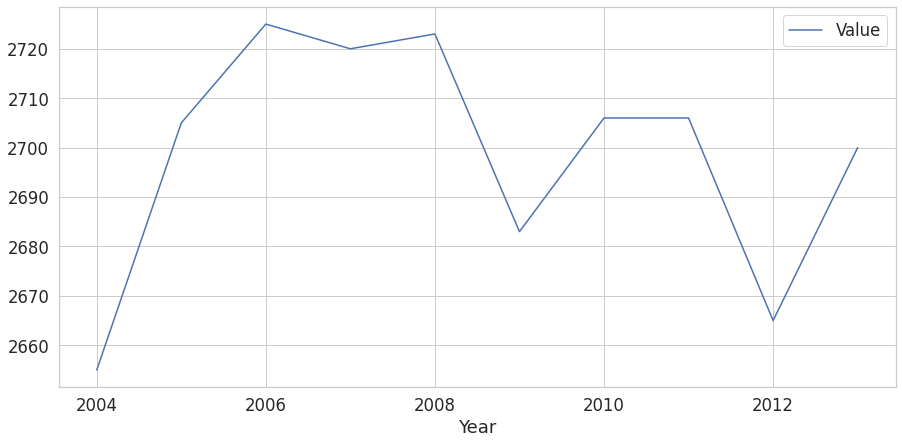

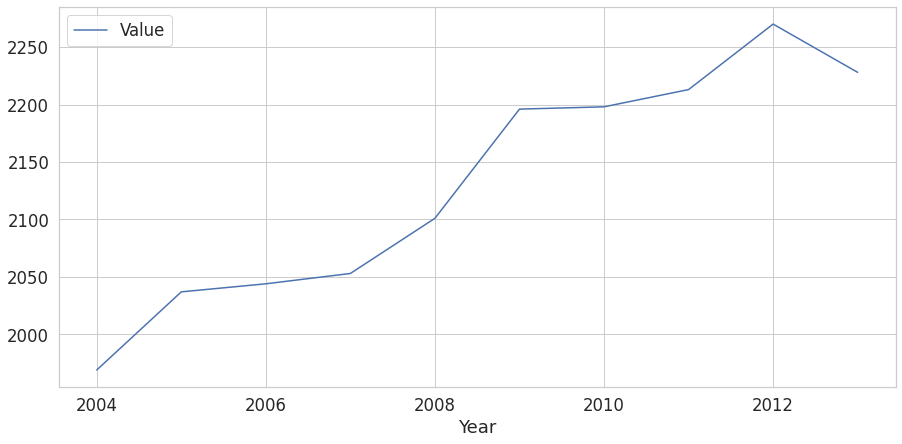

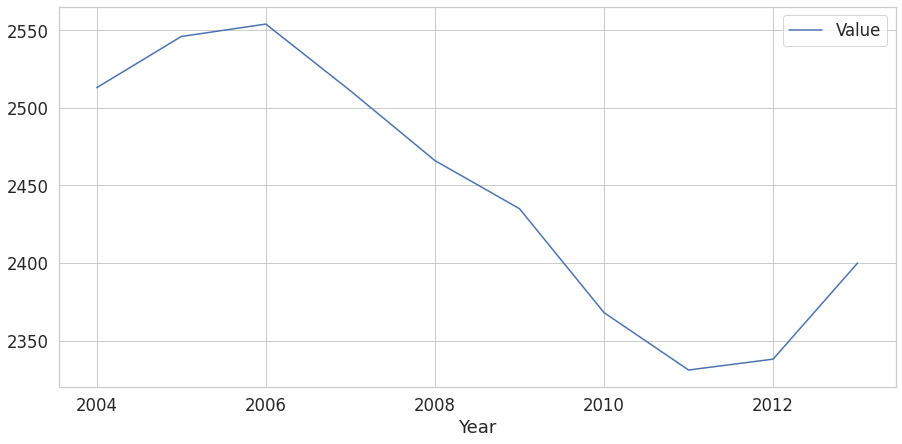

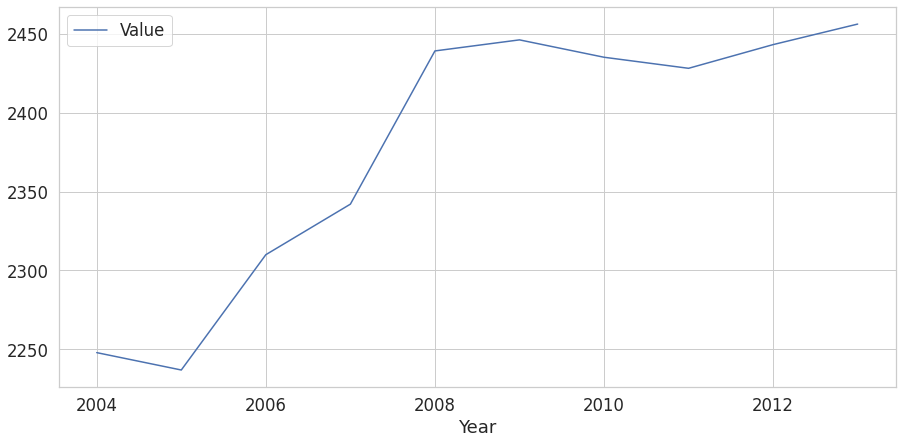

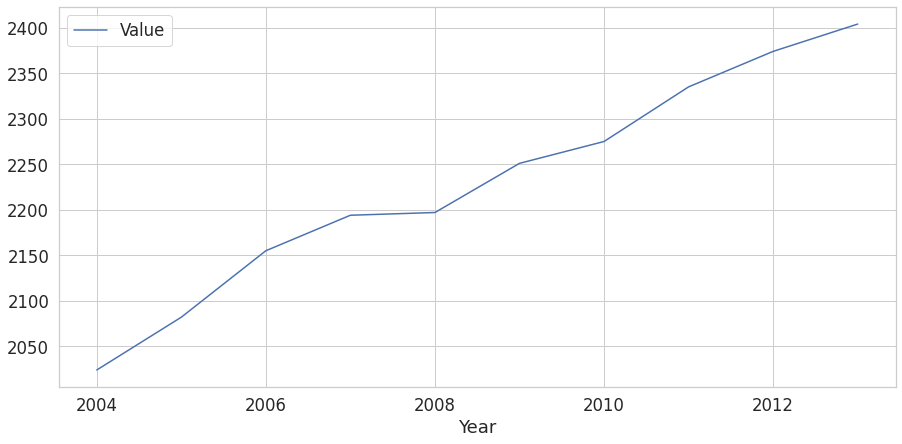

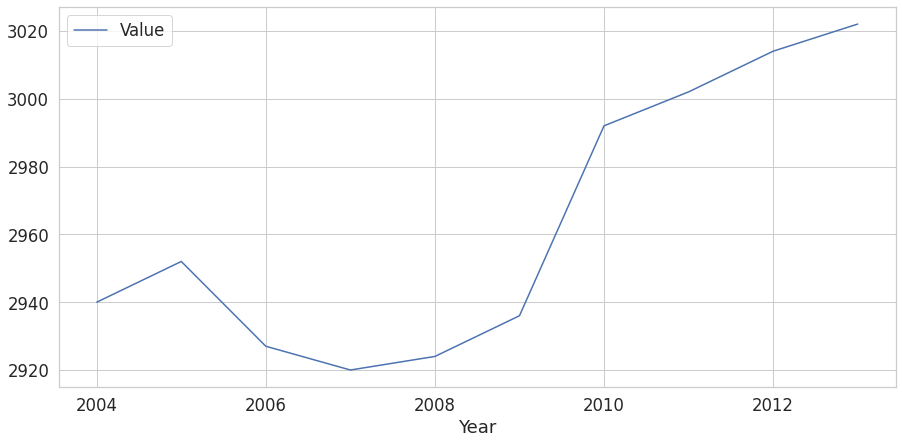

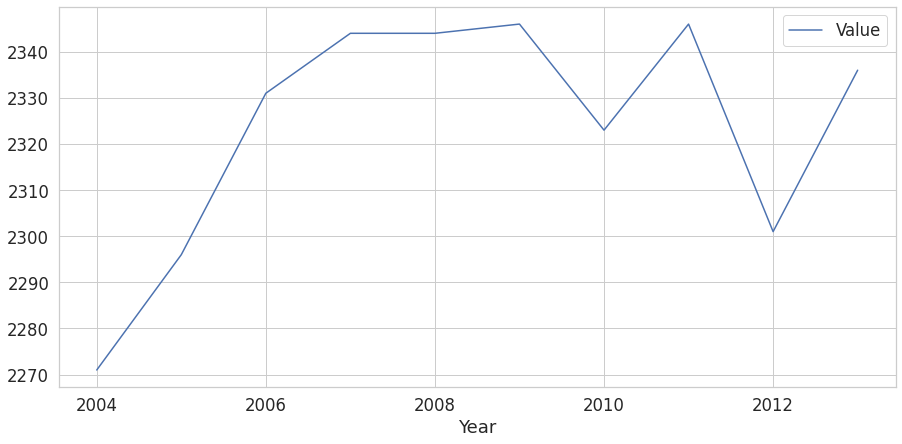

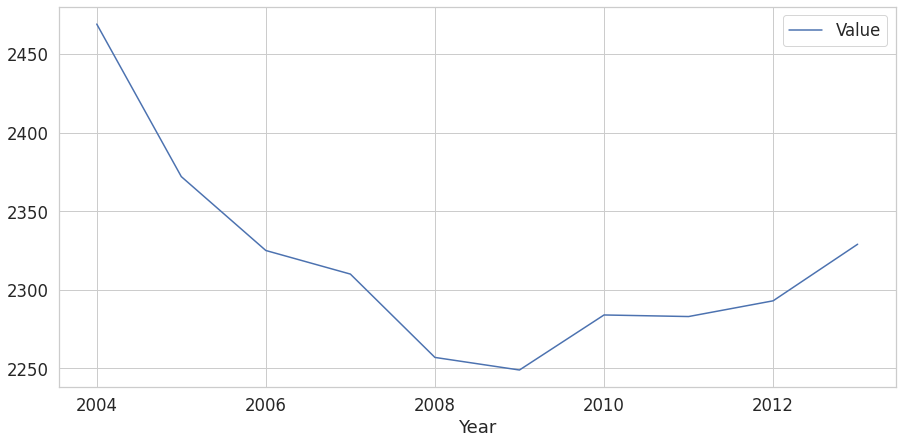

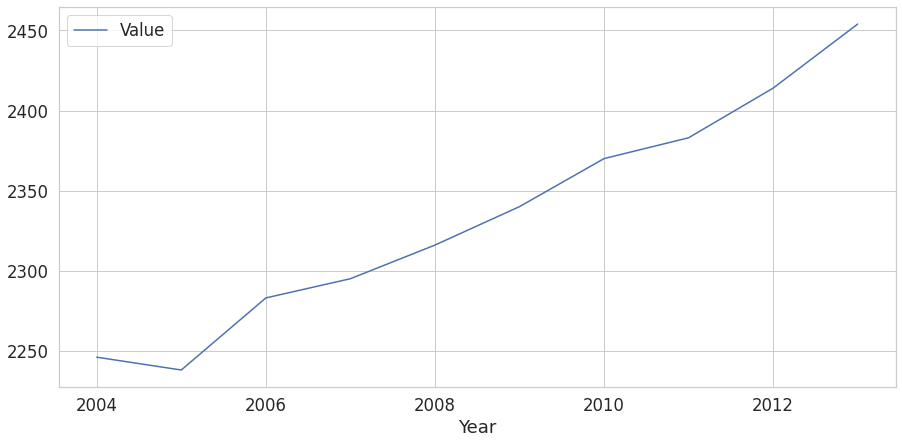

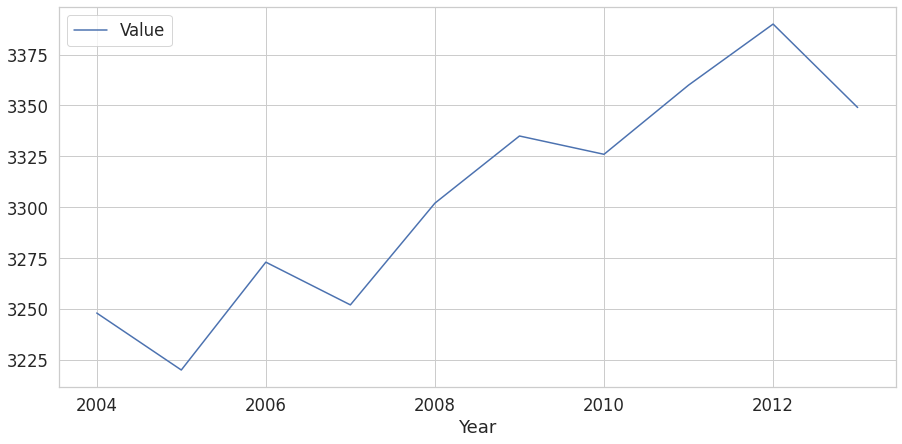

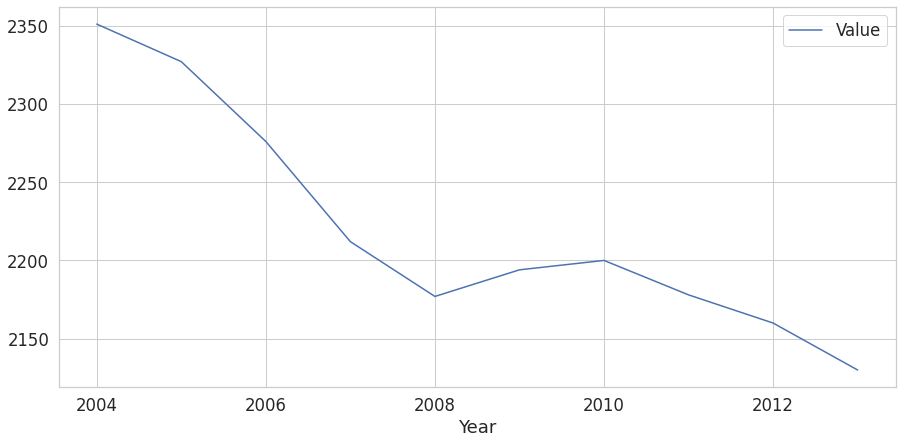

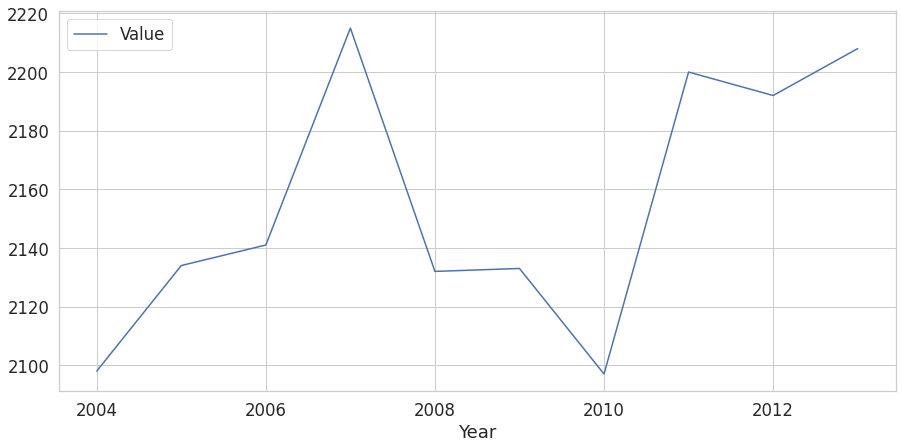

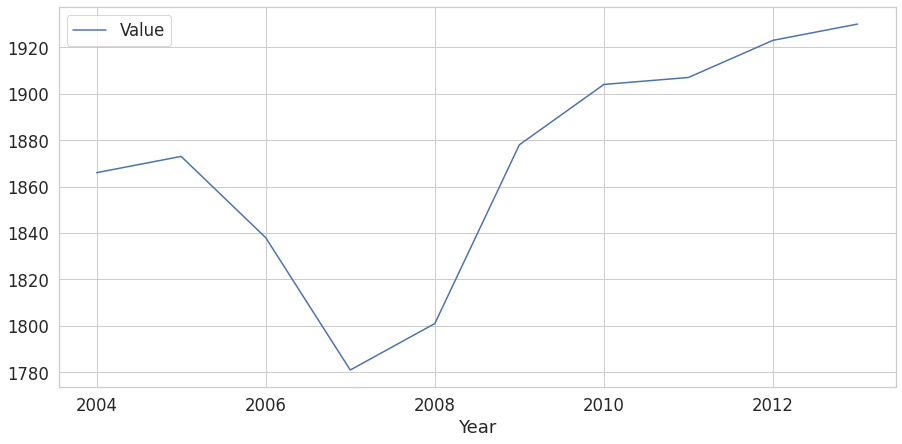

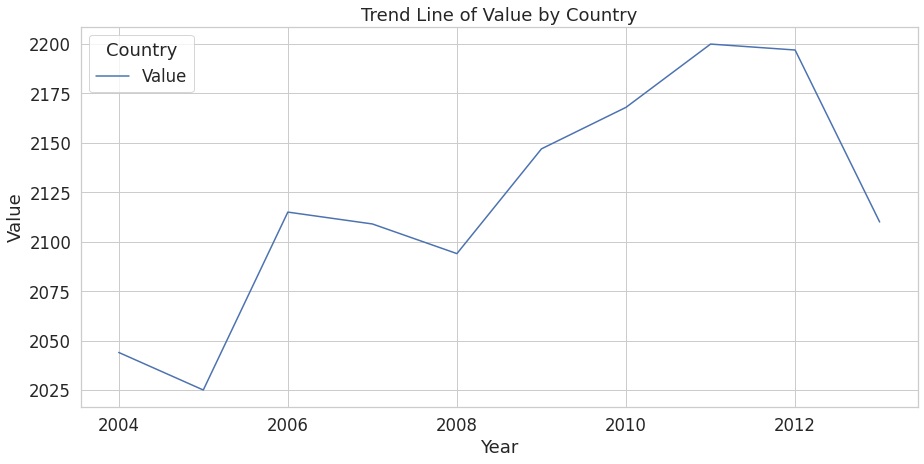

In [ ]:
# Plot the trend line graph by country
grp.groupby('Country').plot(x='Year', y='Value', kind='line')
plt.title('Trend Line of Value by Country')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country')
plt.show

In [ ]:
#add units to the values (kcal/person/day).
# Create a unit registry and define the unit for the values column
#ureg = UnitRegistry()
#unit = ureg.parse_expression('kcal/person/day')

# Convert the values column to quantities
#supply['Value'] = supply['Value'].apply(lambda x: x * unit)

In [ ]:
x = supply.groupby(['Year']).sum().reset_index()
x.head()


,Year,Value
0,2004,107740.0
1,2005,108418.0
2,2006,109386.0
3,2007,110149.0
4,2008,110734.0


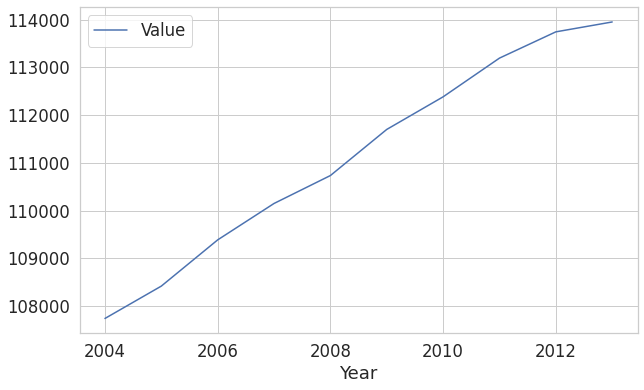

In [ ]:
#total supply for each year across all countries
x.plot.line(x ='Year', y ='Value',figsize=(10,6))

In [ ]:
c = supply.groupby(['Country']).sum().reset_index()
c.head()


,Country,Year,Value
0,Algeria,20085,31118.0
1,Angola,20085,22556.0
2,Benin,20085,25378.0
3,Botswana,20085,22263.0
4,Burkina Faso,20085,26072.0


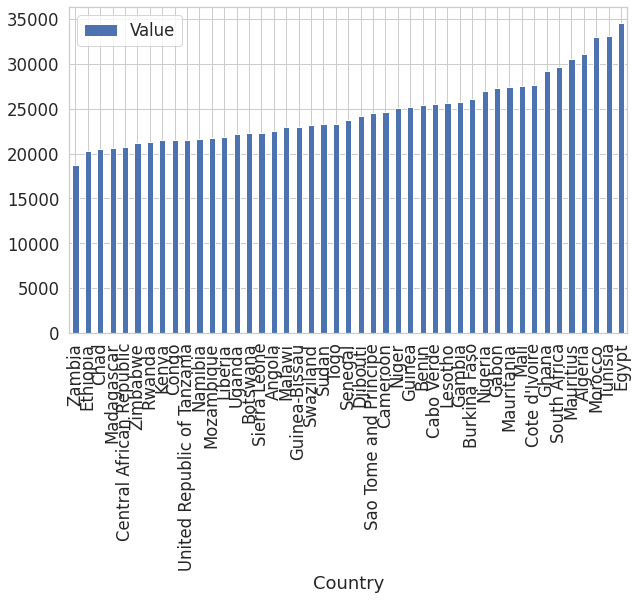

In [ ]:
#total supply for each country across all years
c.sort_values('Value', ascending=True).plot.bar(x ='Country', y ='Value',figsize=(10,6))

This visualisation shows us that Egypt, Tunisia and Morocco had the highest food supply per capita.

In [ ]:
#Which three countries had the lowest food supply between 2004 and 2006 respectively(inclusive)?  
supply['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

In [ ]:
low = supply.loc[supply['Year'].isin([2004,2005,2006])]

In [ ]:
low.head()

,Country,Year,Value
0,Algeria,2004,2987.0
1,Algeria,2005,2958.0
2,Algeria,2006,3047.0
10,Angola,2004,2030.0
11,Angola,2005,2077.0


In [ ]:
low.tail()

,Country,Year,Value
431,Zambia,2005,1873.0
432,Zambia,2006,1838.0
440,Zimbabwe,2004,2044.0
441,Zimbabwe,2005,2025.0
442,Zimbabwe,2006,2115.0


In [ ]:
low.groupby(['Country']).sum().reset_index().sort_values('Value',ascending=True)

,Country,Year,Value
43,Zambia,6015,5577.0
13,Ethiopia,6015,5827.0
7,Central African Republic,6015,6044.0
32,Rwanda,6015,6050.0
8,Chad,6015,6082.0
22,Madagascar,6015,6123.0
44,Zimbabwe,6015,6184.0
28,Mozambique,6015,6208.0
1,Angola,6015,6226.0
35,Sierra Leone,6015,6261.0


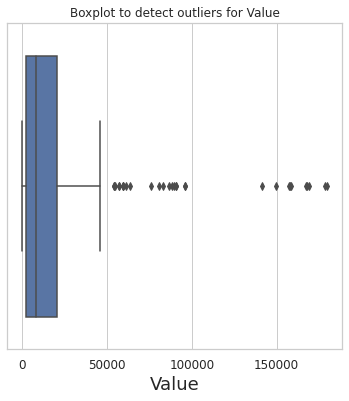

In [ ]:
# Create a boxplot to visualize outliers in food production
### YOUR CODE HERE ###

# Create a boxplot to visualize distribution of `Value` in food production and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Value', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=grouped['Value'])
plt.show()

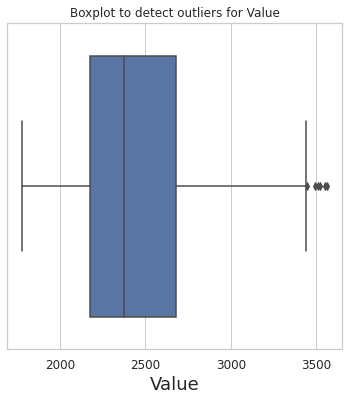

In [ ]:
# Create a boxplot to visualize outliers in food supply
### YOUR CODE HERE ###

# Create a boxplot to visualize distribution of `Value` in food production and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Value', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=grp['Value'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

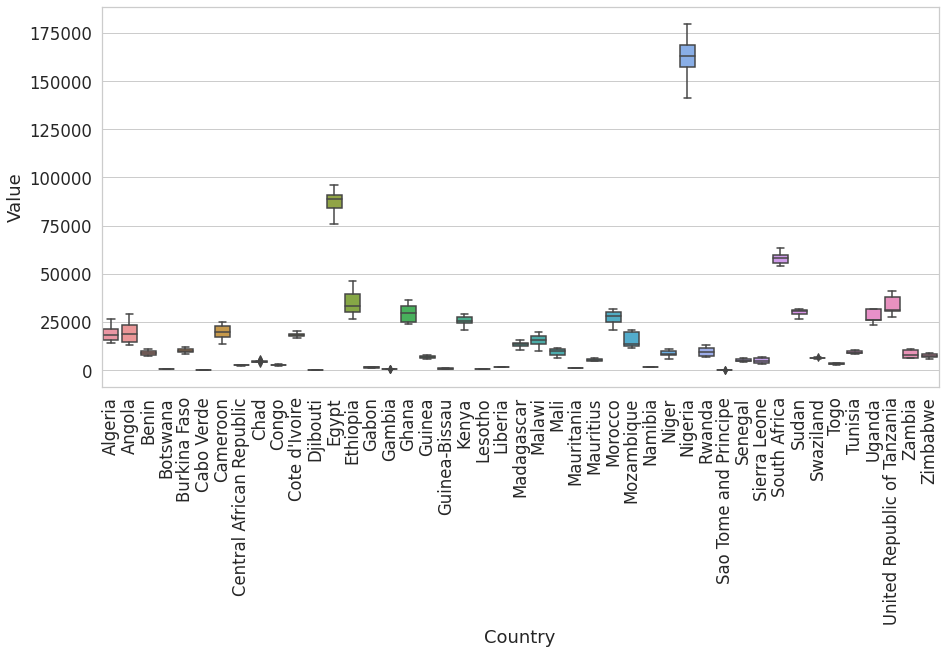

In [ ]:
#Outliers for values of food production for each country
sns.set(rc={'figure.figsize':(15,7)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'Country', y = 'Value', data = grouped)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

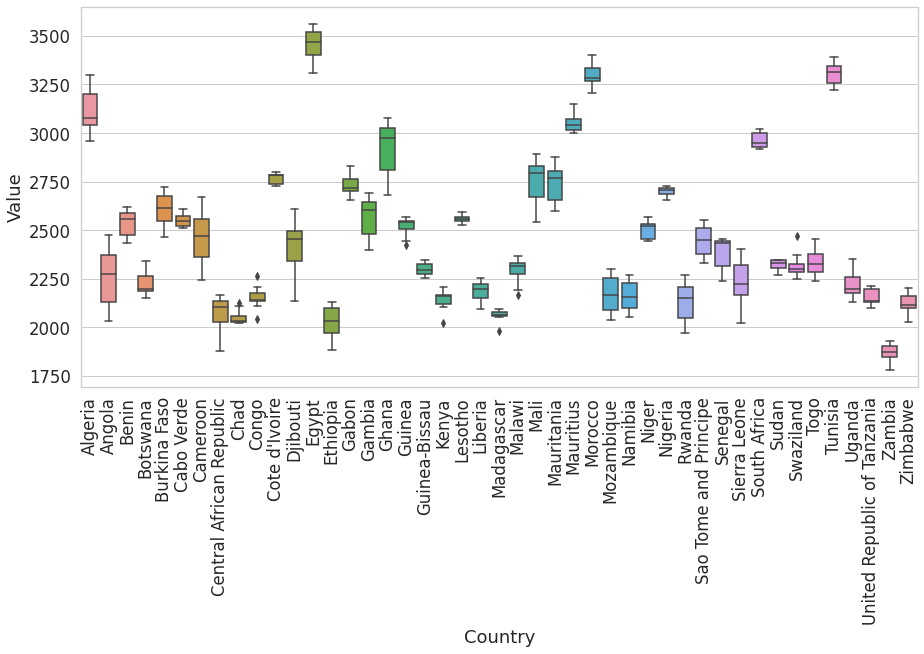

In [ ]:
#Outliers of food supply values of each country
sns.set(rc={'figure.figsize':(15,7)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'Country', y = 'Value', data = grp)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

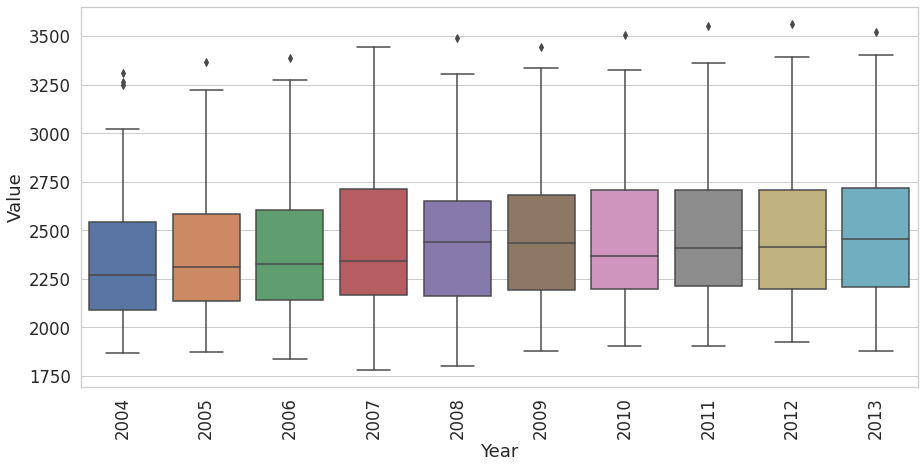

In [ ]:
#Outliers of food supply values of each year
sns.set(rc={'figure.figsize':(15,7)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'Year', y = 'Value', data = grp)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

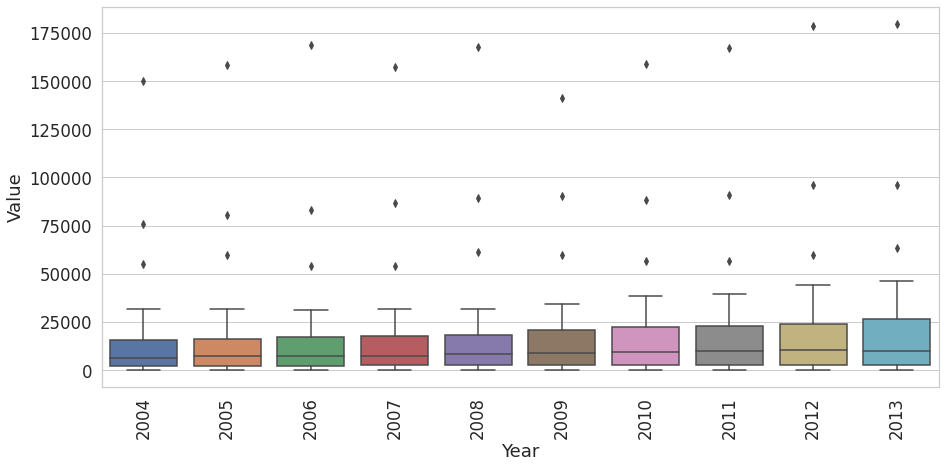

In [ ]:
#Outliers for values of food production for each year
sns.set(rc={'figure.figsize':(15,7)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'Year', y = 'Value', data = grouped)
plt.xticks(rotation=90)

In [ ]:
# Determine the number of rows containing outliers (food production)

# Compute the 25th percentile value in `Value`
percentile25 = grouped['Value'].quantile(0.25)

# Compute the 75th percentile value in `Value`
percentile75 = grouped['Value'].quantile(0.75)

# Compute the interquartile range in `Value`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `Value`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `Value`
outliers = grouped[(grouped['Value'] > upper_limit) | (grouped['Value'] < lower_limit)]

# Count how many rows in the data contain outliers in `Value`
print("Number of rows in the data containing outliers in `Value`:", len(outliers))

Lower limit: -25321.0
Upper limit: 48333.0
Number of rows in the data containing outliers in `Value`: 30


In [ ]:
# Determine the number of rows containing outliers (food supply)

# Compute the 25th percentile value in `Value`
percentile25 = grp['Value'].quantile(0.25)

# Compute the 75th percentile value in `Value`
percentile75 = grp['Value'].quantile(0.75)

# Compute the interquartile range in `Value`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `Value`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `Value`
outliers = grp[(grouped['Value'] > upper_limit) | (grp['Value'] < lower_limit)]

# Count how many rows in the data contain outliers in `Value`
print("Number of rows in the data containing outliers in `Value`:", len(outliers))

Lower limit: 1412.375
Upper limit: 3443.375
Number of rows in the data containing outliers in `Value`: 312


#Find out the outlier for food supply in 2012

In [ ]:
#Get supply data for 2012 for all countries
supply_12 = supply[supply['Year']==2012]
supply_12

,Country,Year,Value
8,Algeria,2012,3272.0
18,Angola,2012,2384.0
28,Benin,2012,2610.0
38,Botswana,2012,2342.0
48,Burkina Faso,2012,2707.0
58,Cabo Verde,2012,2590.0
68,Cameroon,2012,2622.0
78,Central African Republic,2012,2116.0
88,Chad,2012,2124.0
98,Congo,2012,2158.0


In [ ]:
supply_12.shape

(45, 3)

In [ ]:
# calculate quartiles
Q1 = supply_12['Value'].quantile(0.25)
Q3 = supply_12['Value'].quantile(0.75)
IQR = Q3 - Q1

#define the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# identify the outliers
outliers = supply_12[(supply_12['Value'] < lower_bound) | (supply_12['Value'] > upper_bound)]

# print the outlier values
print(outliers)



    Country  Year   Value
128   Egypt  2012  3561.0


<ipython-input-266-07baa52c8be3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_12['outlier'] = (supply_12['Value'] < lower_bound) | (supply_12['Value'] > upper_bound)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

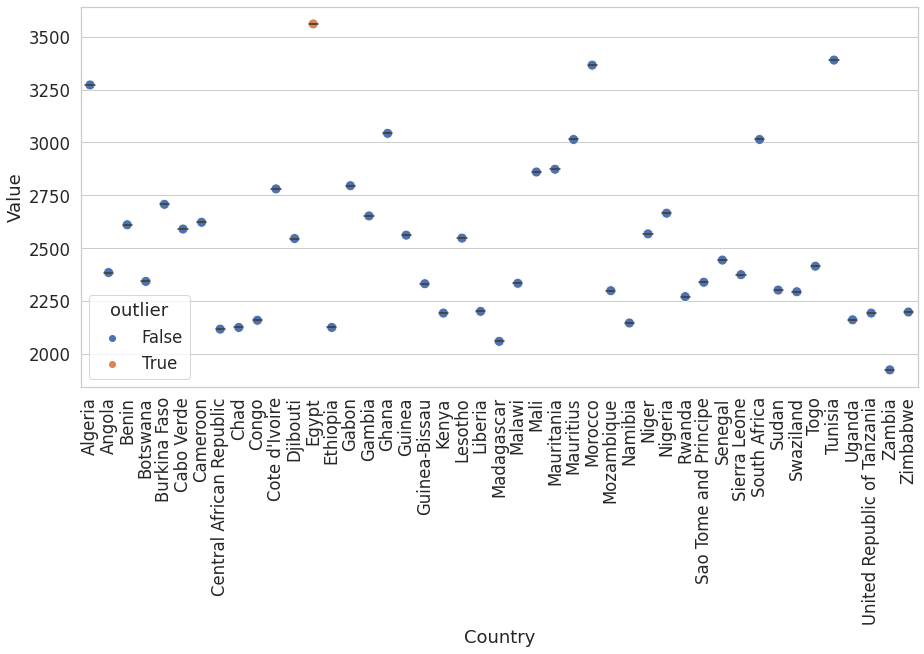

In [ ]:
# calculate quartiles
Q1 = supply_12['Value'].quantile(0.25)
Q3 = supply_12['Value'].quantile(0.75)
IQR = Q3 - Q1

#define the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# identify the outliers
supply_12['outlier'] = (supply_12['Value'] < lower_bound) | (supply_12['Value'] > upper_bound)

# create a boxplot
sns.boxplot(x = 'Country', y = 'Value', data = supply_12, width = 0.5, fliersize = 2)

# Add the outlier points
sns.scatterplot(x = 'Country', y = 'Value', data = supply_12, hue = 'outlier', s = 100)
plt.xticks(rotation=90)

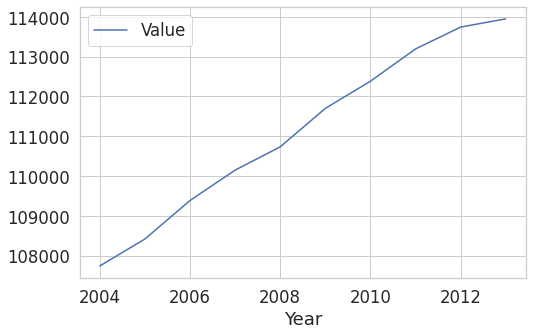

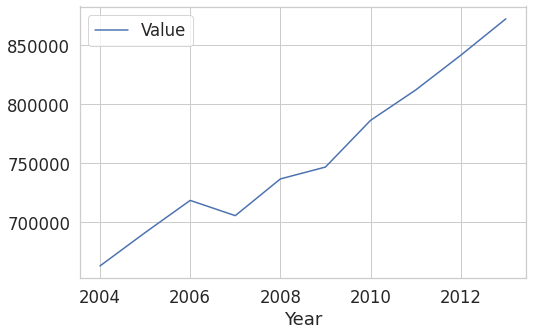

In [ ]:
#Comparison between ave food production and consumption for each year
#total supply for each year across all countries
x.plot.line(x ='Year', y ='Value',figsize=(8,5))
#total production for each year across all countries
p.plot.line(x ='Year', y ='Value',figsize=(8,5))

In [ ]:
copy = fprod.copy()

In [ ]:
copy.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [ ]:
copy['Item'].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Oats',
       'Sorghum and products', 'Cereals, Other', 'Potatoes and products',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Beans', 'Peas',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed',
       'Olives (including preserved)', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Oranges, Mandarines',
       'Lemons, Limes and products', 'Grapefruit and products',
       'Citrus, Other', 'Bananas', 'Apples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other', 'Pimento',
       'Wine', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Of

In [ ]:
#Get all rows where the item is rice for all countries
rice = copy[copy['Item']=='Rice (Milled Equivalent)']
rice.head()

,Country,Item,Year,Value
10,Algeria,Rice (Milled Equivalent),2004,0
11,Algeria,Rice (Milled Equivalent),2005,0
12,Algeria,Rice (Milled Equivalent),2006,0
13,Algeria,Rice (Milled Equivalent),2007,0
14,Algeria,Rice (Milled Equivalent),2008,0


In [ ]:
#drop rows where value is 0
Rice = rice.loc[rice["Value"] != 0]

In [ ]:
Rice.head()

,Country,Item,Year,Value
590,Angola,Rice (Milled Equivalent),2004,9
591,Angola,Rice (Milled Equivalent),2005,6
592,Angola,Rice (Milled Equivalent),2006,3
593,Angola,Rice (Milled Equivalent),2007,3
594,Angola,Rice (Milled Equivalent),2008,6


In [ ]:
#Groupby Year then find the mean for all countries
mean = Rice.groupby('Year')['Value'].mean() 

In [ ]:
mean.head()

Year
2004    365.235294
2005    378.657143
2006    423.617647
2007    404.029412
2008    469.735294
Name: Value, dtype: float64

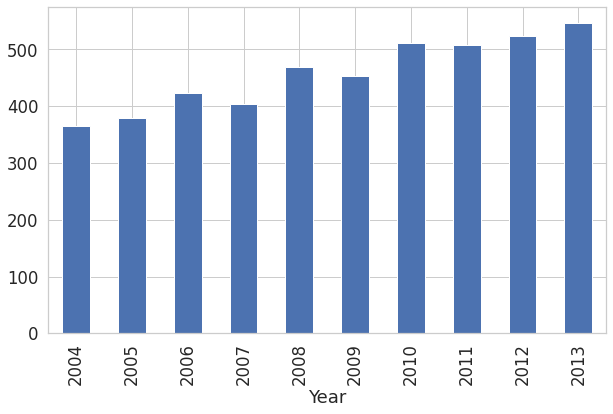

In [ ]:
#Trend of ave. rice production through the years
mean.plot.bar(x ='Year', y ='Value',figsize=(10,6))

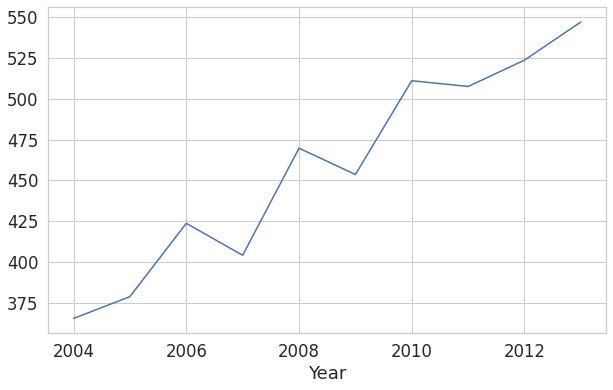

In [ ]:
#Trend of ave rice production through the years
mean.plot.line(x ='Year', y ='Value',figsize=(10,6))

There is an upward trend in average rice production through the years.

In [ ]:
#What three countries have produced the highest total quantity of rice from 2004 to 2013?
top_3 = Rice.groupby('Country')['Value'].sum().reset_index()
top_3.head()

,Country,Value
0,Angola,103
1,Benin,850
2,Burkina Faso,1265
3,Cameroon,767
4,Central African Republic,261


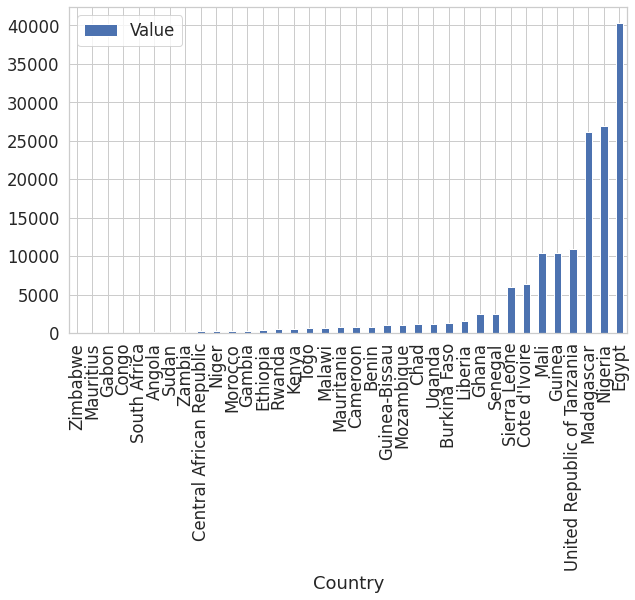

In [ ]:
top_3.sort_values('Value', ascending=True).plot.bar(x ='Country', y ='Value',figsize=(10,6))

In [ ]:
#Get all rows where the item is oats for all countries
oats = copy[copy['Item']=='Oats']
oats.head()

,Country,Item,Year,Value
40,Algeria,Oats,2004,89
41,Algeria,Oats,2005,78
42,Algeria,Oats,2006,89
43,Algeria,Oats,2007,92
44,Algeria,Oats,2008,27


In [ ]:
#Highest value of oats 2010
oats_10 = oats[oats['Year']==2010]
oats_10.sort_values('Value',ascending=False)

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
9286,Kenya,Oats,2010,3
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1
7746,Ghana,Oats,2010,0
10026,Lesotho,Oats,2010,0


In [ ]:
oats_10.describe()

,Year,Value
count,9.0,9.000000
mean,2010.0,23.666667
std,0.0,30.712375
min,2010.0,0.000000
25%,2010.0,1.000000
50%,2010.0,3.000000
75%,2010.0,37.000000
max,2010.0,88.000000
